In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

<h1> Research Questions </h1>

In [2]:
df = pd.read_pickle("./pickle/df_top100.pkl")
exman = pd.read_pickle("./pickle/exman_top50.pkl")
pomodoro = pd.read_pickle("./pickle/pomodoro_top50.pkl")

In [3]:
def normalize_data(data_input, normalizer, data_output, df):
    df[data_output] = df[data_input]/df[normalizer]*60

In [4]:
def get_comparison_summary(parameter):
    return pd.concat([pomodoro[parameter].describe(),exman[parameter].describe()],axis=1,keys=["pomodoro","exman"])

<h2>What is the effect of notification blocking and distraction discouragements during a user defined time period on their perceived productivity?</h2>


<h4>goals achieved</h4>

In [5]:
normalize_data("goalsAchieved","minutesInFocus","goalsAchievedPerHour", exman)
normalize_data("goalsAchieved","minutesInFocus","goalsAchievedPerHour", pomodoro)
normalize_data("goalsAchieved","minutesInFocus","goalsAchievedPerHour", df)

In [6]:
exman["goalsAchievedPerHour"].mean()

1.5325573859843704

In [7]:
pomodoro["goalsAchievedPerHour"].mean()

1.1990577019461512

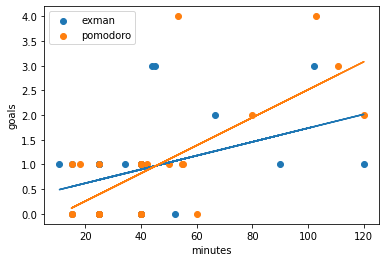

In [8]:
plt.scatter(exman["minutesInFocus"],exman["goalsAchieved"],label="exman")
plt.scatter(pomodoro["minutesInFocus"],pomodoro["goalsAchieved"], label="pomodoro")
plt.legend()

slope, intercept, r, p, stderr = scipy.stats.linregress(exman["minutesInFocus"], exman["goalsAchieved"])
plt.plot(exman["minutesInFocus"], intercept + slope * exman["minutesInFocus"])

slope, intercept, r, p, stderr = scipy.stats.linregress(pomodoro["minutesInFocus"], pomodoro["goalsAchieved"])
plt.plot(pomodoro["minutesInFocus"], intercept + slope * pomodoro["minutesInFocus"])

plt.xlabel("minutes")
plt.ylabel("goals")

plt.show()

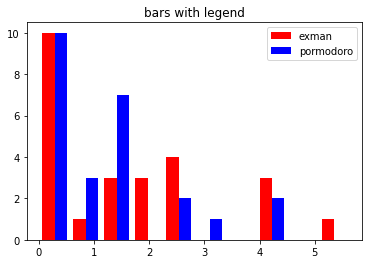

In [9]:
x = [list(exman["goalsAchievedPerHour"]),list(pomodoro["goalsAchievedPerHour"])]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [10]:
exman[["PSNR", "goalsAchieved", "goalsAchievedPerHour", "percentageCompletedGoals", "minutesInFocus"]].sort_values("goalsAchievedPerHour").tail(20)

,PSNR,goalsAchieved,goalsAchievedPerHour,percentageCompletedGoals,minutesInFocus
184,p11,0,0.000000,0.00,40.00
199,p12,0,0.000000,0.00,25.00
194,p12,0,0.000000,0.00,25.00
5,p01,0,0.000000,0.00,25.00
222,p17,1,0.500000,0.50,120.00
79,p07,1,0.668747,0.50,89.72
9,p01,1,1.500000,1.00,40.00
144,p09,1,1.500000,1.00,40.00
10,p01,1,1.500000,1.00,40.00
137,p09,1,1.748761,1.00,34.31


In [11]:
pomodoro[["PSNR", "goalsAchieved", "goalsAchievedPerHour", "percentageCompletedGoals", "minutesInFocus"]].sort_values("goalsAchievedPerHour").tail(20)

,PSNR,goalsAchieved,goalsAchievedPerHour,percentageCompletedGoals,minutesInFocus
209,p12,0,0.000000,0.00,25.00
33,p01,0,0.000000,0.00,25.00
202,p12,0,0.000000,0.00,15.00
153,p09,0,0.000000,0.00,40.00
204,p12,0,0.000000,0.00,25.00
217,p17,2,1.000000,0.67,120.00
213,p17,1,1.090909,0.50,55.00
53,p07,1,1.098499,1.00,54.62
102,p08,1,1.200000,1.00,50.00
162,p09,1,1.429593,1.00,41.97


In [12]:
print("exman: ",exman[ "minutesInFocus"].mean())
print("pomodoro: ",pomodoro[ "minutesInFocus"].mean())

exman:  41.375600000000006
pomodoro:  46.2692


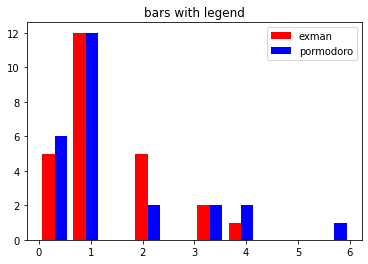

In [13]:
x = [list(exman["goalsSet"]),list(pomodoro["goalsSet"])]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [14]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["goalsAchievedPerHour"], pomodoro["goalsAchievedPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.4241051136153927 T-Statistic:0.806481859642436


The p-value is not significant.

<h4>finished vs total Goals</h4>

In [15]:
exman["percentageCompletedGoals"].mean()

0.59

In [16]:
pomodoro["percentageCompletedGoals"].mean()

0.54

In [17]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["percentageCompletedGoals"], pomodoro["percentageCompletedGoals"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.7120166188917119 T-Statistic:0.37134287437112523


<h4> Broken Focus per hour </h4>

In [18]:
normalize_data("brokenFocus","minutesInFocus","brokenFocusPerHour", exman)
normalize_data("brokenFocus","minutesInFocus","brokenFocusPerHour", pomodoro)
normalize_data("brokenFocus","minutesInFocus","brokenFocusPerHour", df)

In [19]:
exman["brokenFocusPerHour"].mean()

1.0083301611428128

In [20]:
pomodoro["brokenFocusPerHour"].mean()

6.8502006108446105

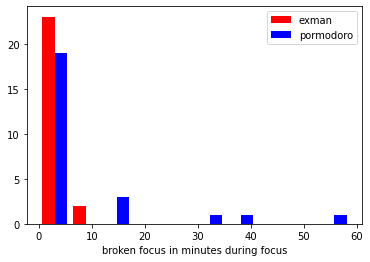

In [21]:
x = [list(exman["brokenFocusPerHour"]),list(pomodoro["brokenFocusPerHour"])]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})

plt.xlabel("broken focus in minutes during focus")

plt.show()

In [22]:
exman[["PSNR", "focusID", "scheduled", "brokenFocus", "brokenFocusPerHour", "nrOfBreaks", "minutesInFocus"]].sort_values("brokenFocusPerHour").tail(10)

,PSNR,focusID,scheduled,brokenFocus,brokenFocusPerHour,nrOfBreaks,minutesInFocus
199,p12,cde1bc4e-f50f-47c3-9f20-9f33d1b24052,False,0.00,0.000000,0,25.00
144,p09,aa790f71-10af-409c-9a76-6bb6381715da,False,0.00,0.000000,0,40.00
194,p12,b3d1e3a7-5698-4741-bce1-ba1190e8abb0,False,0.00,0.000000,0,25.00
166,p10,27652991-99be-4662-bf51-5db0d8e1535b,False,0.00,0.000000,0,45.00
137,p09,_8513icq38gs30b9m6l33ib9k60o3eba28p13cba68cpje...,True,0.15,0.262314,1,34.31
183,p11,719e4219-41c6-4750-a8e7-dd62e25080cb,False,0.84,1.260000,1,40.00
169,p10,40335a80-5d91-4833-8b1c-5ed2dfac9a6d,False,1.27,1.731818,3,44.00
174,p10,8d1a45c2-4db1-48b2-af0c-ccd0d5aea3d0,False,2.04,4.896000,1,25.00
41,p06,66b0c95e-d104-40b6-8220-f428b01a0063,False,6.59,7.563122,1,52.28
40,p06,df1eabfa-1aa7-48eb-8bad-0c4b34931335,False,6.33,9.495000,1,40.00


In [23]:
pomodoro[["PSNR", "focusID", "scheduled", "brokenFocus", "brokenFocusPerHour", "nrOfBreaks", "minutesInFocus"]].sort_values("brokenFocusPerHour").tail(20)

,PSNR,focusID,scheduled,brokenFocus,brokenFocusPerHour,nrOfBreaks,minutesInFocus
103,p08,e8edfb5e-dd63-4cf0-9b4d-c665ec339ec1,False,0.00,0.000000,0,40.00
28,p01,afa7b93c-0911-473a-aef9-7d6de57c7f60,False,0.00,0.000000,0,15.00
202,p12,087364f4-73c3-426a-bead-157b46555285,False,0.00,0.000000,0,15.00
204,p12,537609b5-f648-4e6b-af29-cf983936a3bd,False,0.00,0.000000,0,25.00
120,p08,555ce1ff-d317-47a8-aaae-59521d39fb7c,False,0.00,0.000000,0,25.00
33,p01,ba129272-2a0d-4bbc-9fef-e3790cfce4be,False,0.00,0.000000,0,25.00
209,p12,a2a3b0d2-93b3-4acc-b156-5a0096bdf238,False,0.00,0.000000,0,25.00
218,p17,255d9c15-aaf9-48c1-a145-1e5aa4f6a8f3,False,0.00,0.000000,0,60.00
213,p17,e210b4af-1cc1-4f51-97ae-5a27179382c2,False,0.00,0.000000,0,55.00
23,p01,2976cf4b-9ae4-47d5-b17a-9c72ba3e69cc,False,0.00,0.000000,0,102.71


In [24]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["brokenFocusPerHour"], pomodoro["brokenFocusPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.06394036064054308 T-Statistic:-1.937158211974094


In [25]:
print("exman: ",exman["brokenFocusPerHour"].mean())
print("pomodoro: ", pomodoro[pomodoro["brokenFocusPerHour"] < 16.5]['brokenFocusPerHour'].mean())


exman:  1.0083301611428128
pomodoro:  1.9428416032325118


In [26]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["brokenFocusPerHour"], pomodoro[pomodoro["brokenFocusPerHour"] < 16.5]['brokenFocusPerHour'], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.4258260873997448 T-Statistic:-0.8072006372709817


In [27]:
print("exman: ", exman[exman["brokenFocus"] == 0]['brokenFocus'].count() / exman["brokenFocus"].count())
print("pomodoro: ", pomodoro[pomodoro["brokenFocus"] == 0]['brokenFocus'].count() / pomodoro["brokenFocus"].count())

exman:  0.76
pomodoro:  0.68


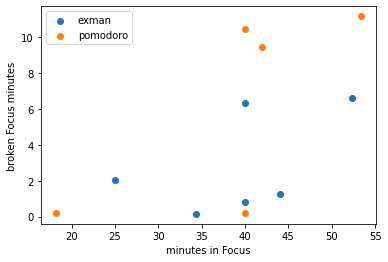

In [28]:
plt.scatter(exman[exman["brokenFocus"] != 0]['minutesInFocus'],exman[exman["brokenFocus"] != 0]['brokenFocus'],label="exman")
plt.scatter(pomodoro.loc[(pomodoro['brokenFocus'] != 0) & (pomodoro['brokenFocus']< 16.5)]['minutesInFocus'],
            pomodoro.loc[(pomodoro['brokenFocus'] != 0) & (pomodoro['brokenFocus']< 16.5)]['brokenFocus'], label="pomodoro")
plt.xlabel("minutes in Focus")
plt.ylabel("broken Focus minutes")
plt.legend()

<h4> broken focus frequency </h4>


In [29]:
normalize_data("nrOfBreaks","minutesInFocus","brokenFrequencyPerHour", exman)
normalize_data("nrOfBreaks","minutesInFocus","brokenFrequencyPerHour", pomodoro)

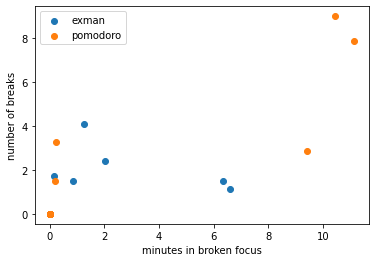

In [30]:
plt.scatter(exman["brokenFocus"],exman["brokenFrequencyPerHour"],label="exman")
plt.scatter(pomodoro[pomodoro["brokenFocus"]<16.5]["brokenFocus"],
            pomodoro[pomodoro["brokenFocus"]<16.5]["brokenFrequencyPerHour"], label="pomodoro")
plt.xlabel("minutes in broken focus")
plt.ylabel("number of breaks")
plt.legend()

In [31]:
exman["brokenFrequencyPerHour"].mean()

0.49549347186488535

In [32]:
pomodoro["brokenFrequencyPerHour"].mean()

1.1613143068500476

In [33]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["brokenFrequencyPerHour"], pomodoro["brokenFrequencyPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.20995298953976355 T-Statistic:-1.2789806508261512


The effect on frequency of breaks is not significant, but the difference of the break duration between pomodoro and exman is significant on a 5% level. Reason for that not known yet.

<h4>distraction time </h4>

In [34]:
normalize_data("distractionTime","minutesInFocus","distractionTimePerHour",exman)
normalize_data("distractionTime","minutesInFocus","distractionTimePerHour",pomodoro)

In [35]:
exman["distractionTimePerHour"].mean()

3.111028492015299

In [36]:
pomodoro["distractionTimePerHour"].mean()

1.2358448649511553

In [37]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["distractionTimePerHour"], pomodoro["distractionTimePerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.41713440262591484 T-Statistic:0.8226707944359464


Not significant

<h4> Productivity Rating </h4>

In [38]:
exman_rating = exman.dropna(subset=["rating"])
pomodoro_rating = pomodoro.dropna(subset=["rating"])

In [39]:
print("exman: ",exman_rating['rating'].astype(int).mean())
print("pomodoro: ",pomodoro_rating['rating'].astype(int).mean())

exman:  5.761904761904762
pomodoro:  5.476190476190476


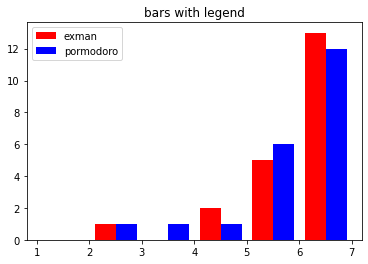

In [40]:
bins = [1,2,3,4,5,6,7]
x = [list(exman_rating["rating"].astype(int)),list(pomodoro_rating["rating"].astype(int))]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, bins, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [41]:
tStat, pValue = stats.ttest_ind(exman_rating["rating"].astype(int), pomodoro_rating["rating"].astype(int), equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.48510774257232236 T-Statistic:0.7046642634176439


The p-Value and the t-test is not significant. Therefore, we cannot assume, that exman provides an improvement of the productivity compared to the pomodoro baseline.

<h4>nr of notifications vs rating</h4>


In [42]:
np.corrcoef(exman_rating["messagesReceivedInFocus"],exman_rating["rating"].astype(int))[0][1]

-0.5079375233312562

In [43]:
np.corrcoef(pomodoro_rating["messagesReceivedInFocus"],pomodoro_rating["rating"].astype(int))[0][1]

0.1883264379796961

<h2> General Stats </h2>

In [44]:
pd.concat([
    df[df.PSNR == "p01"]["appVersion"].describe(),
    df[df.PSNR == "p02"]["appVersion"].describe(),
    df[df.PSNR == "p06"]["appVersion"].describe(),
    df[df.PSNR == "p07"]["appVersion"].describe(),
    df[df.PSNR == "p08"]["appVersion"].describe(),
    df[df.PSNR == "p09"]["appVersion"].describe(),
    df[df.PSNR == "p10"]["appVersion"].describe(),
    df[df.PSNR == "p11"]["appVersion"].describe(),
    df[df.PSNR == "p12"]["appVersion"].describe(),
    df[df.PSNR == "p17"]["appVersion"].describe()
],axis=1, keys= df.PSNR.unique())

,p07,p09,p01,p17,p12,p06,p08,p11,p02,p10
count,11,1,4,3,5,8,3,3,6,6
unique,2,1,2,2,2,2,1,2,2,2
top,exman,pomodoro,exman,exman,pomodoro,exman,exman,exman,pomodoro,pomodoro
freq,7,1,2,2,4,5,3,2,4,5


Focus sessions are mostly evenly distributed for pomodoro and exman (except maybe for p01)

<h4> notification per focus per hour </h4>

In [45]:
normalize_data("messagesReceivedInFocus","minutesInFocus","messagesPerHour",exman)
normalize_data("messagesReceivedInFocus","minutesInFocus","messagesPerHour",pomodoro)
normalize_data("messagesReceivedInFocus","minutesInFocus","messagesPerHour",df)

In [46]:
df["messagesPerHour"].describe()

count    50.000000
mean      9.010520
std       8.475208
min       1.098499
25%       3.110750
50%       6.000000
75%      11.250000
max      39.436620
Name: messagesPerHour, dtype: float64

In [47]:
pd.concat([
    df[df.PSNR == "p01"]["messagesPerHour"].describe(),
    df[df.PSNR == "p02"]["messagesPerHour"].describe(),
    df[df.PSNR == "p06"]["messagesPerHour"].describe(),
    df[df.PSNR == "p07"]["messagesPerHour"].describe(),
    df[df.PSNR == "p08"]["messagesPerHour"].describe(),
    df[df.PSNR == "p09"]["messagesPerHour"].describe(),
    df[df.PSNR == "p10"]["messagesPerHour"].describe(),
    df[df.PSNR == "p11"]["messagesPerHour"].describe(),
    df[df.PSNR == "p12"]["messagesPerHour"].describe(),
    df[df.PSNR == "p17"]["messagesPerHour"].describe()
],axis=1, keys= df.PSNR.unique())

,p07,p09,p01,p17,p12,p06,p08,p11,p02,p10
count,11.000000,1.000000,4.000000,3.000000,5.000000,8.000000,3.000000,3.000000,6.000000,6.000000
mean,15.420364,16.483516,7.235750,2.291550,7.080000,10.226358,7.852525,5.500000,9.733333,2.155397
std,9.982493,NaN,7.203701,1.527030,1.229634,12.342893,7.781394,0.866025,5.552177,0.490092
min,1.168338,16.483516,3.000000,1.098499,6.000000,2.400000,2.666667,4.500000,4.800000,1.500000
25%,7.927833,16.483516,3.332249,1.431084,6.000000,4.053017,3.378788,5.250000,7.200000,2.000000
50%,16.000000,16.483516,3.971500,1.763668,7.200000,5.259185,4.090909,6.000000,7.200000,2.090909
75%,22.800000,16.483516,7.875000,2.888076,7.200000,9.932855,10.445455,6.000000,10.800000,2.233377
max,31.200000,16.483516,18.000000,4.012483,9.000000,39.436620,16.800000,6.000000,20.000000,3.000000


<h4> Autoreplies </h4>

In [48]:
exman["autoReplied"].sum()

3

<h4> Broken Focus measurement in minutes </h4>

In [49]:
get_comparison_summary("brokenFocusPerHour")

,pomodoro,exman
count,25.000000,25.000000
mean,6.850201,1.008330
std,14.868971,2.504696
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.725275,0.000000
max,58.650000,9.495000


<h4> number of breaks per focus sessions per Hour </h4>

In [50]:
get_comparison_summary("brokenFrequencyPerHour")

,pomodoro,exman
count,25.000000,25.000000
mean,1.161314,0.495493
std,2.392467,1.025366
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.500000,0.000000
max,9.000000,4.090909


<h4> Minutes in focus </h4>

In [51]:
df["minutesInFocus"].describe()

count     50.000000
mean      43.822400
std       27.986884
min       10.650000
25%       25.000000
50%       40.000000
75%       51.710000
max      120.000000
Name: minutesInFocus, dtype: float64

In [52]:
pd.concat([
    df[df.PSNR == "p01"]["minutesInFocus"].describe(),
    df[df.PSNR == "p02"]["minutesInFocus"].describe(),
    df[df.PSNR == "p06"]["minutesInFocus"].describe(),
    df[df.PSNR == "p07"]["minutesInFocus"].describe(),
    df[df.PSNR == "p08"]["minutesInFocus"].describe(),
    df[df.PSNR == "p09"]["minutesInFocus"].describe(),
    df[df.PSNR == "p10"]["minutesInFocus"].describe(),
    df[df.PSNR == "p11"]["minutesInFocus"].describe(),
    df[df.PSNR == "p12"]["minutesInFocus"].describe(),
    df[df.PSNR == "p17"]["minutesInFocus"].describe()
],axis=1, keys= df.PSNR.unique())

,p07,p09,p01,p17,p12,p06,p08,p11,p02,p10
count,11.000000,1.0,4.00,3.000000,5.000000,8.000000,3.000000,3.0,6.000000,6.000000
mean,39.874545,18.2,43.07,82.133333,36.000000,35.412500,38.000000,40.0,21.666667,81.386667
std,34.257261,NaN,6.14,24.613137,10.839742,16.365011,11.269428,0.0,5.163978,31.385619
min,15.000000,18.2,40.00,54.620000,25.000000,10.650000,25.000000,40.0,15.000000,53.320000
25%,20.000000,18.2,40.00,72.170000,25.000000,25.000000,34.500000,40.0,17.500000,56.250000
50%,25.000000,18.2,40.00,89.720000,40.000000,37.155000,44.000000,40.0,25.000000,70.000000
75%,40.000000,18.2,43.07,95.890000,40.000000,40.492500,44.500000,40.0,25.000000,110.000000
max,110.910000,18.2,52.28,102.060000,50.000000,66.370000,45.000000,40.0,25.000000,120.000000


<h4> distraction count per participant and per focus session </h4>

In [53]:
pd.concat([
    df[df.PSNR == "p01"]["distractionCount"].describe(),
    #df[df.PSNR == "p02"]["distractionCount"].describe(),
    #df[df.PSNR == "p06"]["distractionCount"].describe(),
    #df[df.PSNR == "p07"]["distractionCount"].describe(),
    df[df.PSNR == "p08"]["distractionCount"].describe(),
    df[df.PSNR == "p09"]["distractionCount"].describe(),
    df[df.PSNR == "p10"]["distractionCount"].describe(),
    df[df.PSNR == "p11"]["distractionCount"].describe(),
    df[df.PSNR == "p12"]["distractionCount"].describe()
    #df[df.PSNR == "p17"]["distractionCount"].describe()
],axis=1, keys= ["p01", "p08", "p09", "p10", "p11", "p12"])


,p01,p08,p09,p10,p11,p12
count,11.000000,5.000000,8.000000,3.000000,3.000000,6.000000
mean,0.545455,1.400000,8.375000,1.000000,2.333333,3.000000
std,1.293340,1.949359,10.676242,1.732051,1.527525,6.418723
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000
75%,0.000000,3.000000,11.000000,1.500000,3.000000,1.500000
max,4.000000,4.000000,27.000000,3.000000,4.000000,16.000000


In [54]:
pd.concat([
    df[df.PSNR == "p01"]["distractionTime"].describe(),
    #df[df.PSNR == "p02"]["distractionTime"].describe(),
    #df[df.PSNR == "p06"]["distractionTime"].describe(),
    #df[df.PSNR == "p07"]["distractionTime"].describe(),
    df[df.PSNR == "p08"]["distractionTime"].describe(),
    df[df.PSNR == "p09"]["distractionTime"].describe(),
    df[df.PSNR == "p10"]["distractionTime"].describe(),
    df[df.PSNR == "p11"]["distractionTime"].describe(),
    df[df.PSNR == "p12"]["distractionTime"].describe(),
    #df[df.PSNR == "p17"]["distractionTime"].describe()
],axis=1, keys=["p01", "p08", "p09", "p10", "p11", "p12"])

# clear p2,p6,p7 and p17 out of the windowstracking dataframe

,p01,p08,p09,p10,p11,p12
count,11.000000,5.000000,8.000000,3.000000,3.000000,6.000000
mean,0.085033,0.966867,2.000842,1.368750,0.557844,1.395508
std,0.203469,1.591840,3.506714,2.370745,0.436864,3.201756
min,0.000000,0.000000,0.000000,0.000000,0.067117,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.384567,0.000000
50%,0.000000,0.000000,0.360567,0.000000,0.702017,0.000000
75%,0.000000,1.167250,1.707592,2.053125,0.803208,0.339325
max,0.635133,3.667083,9.386667,4.106250,0.904400,7.920617


<h4> Rating </h4>

In [55]:
pd.concat([pomodoro["rating"].dropna().astype(int).describe(),exman["rating"].dropna().astype(int).describe()],axis=1,keys=["pomodoro","exman"])

,pomodoro,exman
count,21.000000,21.000000
mean,5.476190,5.761905
std,1.289149,1.338087
min,2.000000,2.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,7.000000
max,7.000000,7.000000


In [56]:
# productivity per version and participants needs to be fixed
pd.concat([
    df[df.PSNR == "p01"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p02"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p06"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p07"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p08"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p09"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p10"]["rating"].dropna().astype(int).describe(),
    #df[df.PSNR == "p11"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p12"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p17"]["rating"].dropna().astype(int).describe()
],axis=1, keys= ["p01","p02","p06","p07", "p08", "p09", "p10", "p12","p17"])

,p01,p02,p06,p07,p08,p09,p10,p12,p17
count,9.000000,1.0,4.000000,3.0,5.000000,7.000000,2.0,5.000000,6.000000
mean,5.444444,5.0,3.000000,5.0,6.400000,6.571429,6.0,6.200000,5.666667
std,1.013794,NaN,1.414214,0.0,0.894427,0.786796,0.0,0.447214,1.211060
min,4.000000,5.0,2.000000,5.0,5.000000,5.000000,6.0,6.000000,4.000000
25%,5.000000,5.0,2.000000,5.0,6.000000,6.500000,6.0,6.000000,5.000000
50%,6.000000,5.0,2.500000,5.0,7.000000,7.000000,6.0,6.000000,5.500000
75%,6.000000,5.0,3.500000,5.0,7.000000,7.000000,6.0,6.000000,6.750000
max,7.000000,5.0,5.000000,5.0,7.000000,7.000000,6.0,7.000000,7.000000


P17 has pretty low average productivity rating compared to others. Potential explanations from interview?

In [57]:
# productivity per version and participants needs to be fixed
pd.concat([
    exman_rating[exman_rating.PSNR == "p01"]["rating"].dropna().astype(int).describe(),
    #exman_rating[exman_rating.PSNR == "p02"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p06"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p07"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p08"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p09"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p10"]["rating"].dropna().astype(int).describe(),
    #exman_rating[exman_rating.PSNR == "p11"]["rating"].dropna().astype(int).describe(),
    #exman_rating[exman_rating.PSNR == "p12"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p17"]["rating"].dropna().astype(int).describe()
],axis=1, keys= ["p01","p06","p07", "p08", "p09", "p10","p17"])

,p01,p06,p07,p08,p09,p10,p17
count,7.000000,2.00000,2.0,1.0,5.000000,2.0,1.0
mean,5.285714,3.50000,5.0,7.0,6.800000,6.0,7.0
std,1.112697,2.12132,0.0,NaN,0.447214,0.0,NaN
min,4.000000,2.00000,5.0,7.0,6.000000,6.0,7.0
25%,4.500000,2.75000,5.0,7.0,7.000000,6.0,7.0
50%,5.000000,3.50000,5.0,7.0,7.000000,6.0,7.0
75%,6.000000,4.25000,5.0,7.0,7.000000,6.0,7.0
max,7.000000,5.00000,5.0,7.0,7.000000,6.0,7.0


In [58]:
# productivity per version and participants needs to be fixed
pd.concat([
    pomodoro_rating[pomodoro_rating.PSNR == "p01"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p02"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p06"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p07"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p08"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p09"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p10"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p11"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p12"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p17"]["rating"].dropna().astype(int).describe()
],axis=1, keys= df.PSNR.unique())

,p07,p09,p01,p17,p12,p06,p08,p11,p02,p10
count,2.0,1.0,2.000000,1.0,4.000000,2.000000,0.0,0.0,4.0,5.000000
mean,6.0,5.0,2.500000,5.0,6.250000,6.000000,NaN,NaN,6.0,5.400000
std,0.0,NaN,0.707107,NaN,0.957427,1.414214,NaN,NaN,0.0,1.140175
min,6.0,5.0,2.000000,5.0,5.000000,5.000000,NaN,NaN,6.0,4.000000
25%,6.0,5.0,2.250000,5.0,5.750000,5.500000,NaN,NaN,6.0,5.000000
50%,6.0,5.0,2.500000,5.0,6.500000,6.000000,NaN,NaN,6.0,5.000000
75%,6.0,5.0,2.750000,5.0,7.000000,6.500000,NaN,NaN,6.0,6.000000
max,6.0,5.0,3.000000,5.0,7.000000,7.000000,NaN,NaN,6.0,7.000000


In [59]:
df[df["brokenFocusPerHour"] < 16.5]['brokenFocusPerHour']

p1_rating = df[df.PSNR == "p01"]["rating"].dropna().astype(int)
p7_rating = df[df.PSNR == "p07"]["rating"].dropna().astype(int)
p8_rating = df[df.PSNR == "p08"]["rating"].dropna().astype(int)

p1_broken = df[df.PSNR == "p01"]["percentageCompletedGoals"].dropna().astype(int)
p7_broken = df[df.PSNR == "p07"]["percentageCompletedGoals"].dropna().astype(int)
p8_broken = df[df.PSNR == "p08"]["percentageCompletedGoals"].dropna().astype(int)

#filter for the best results

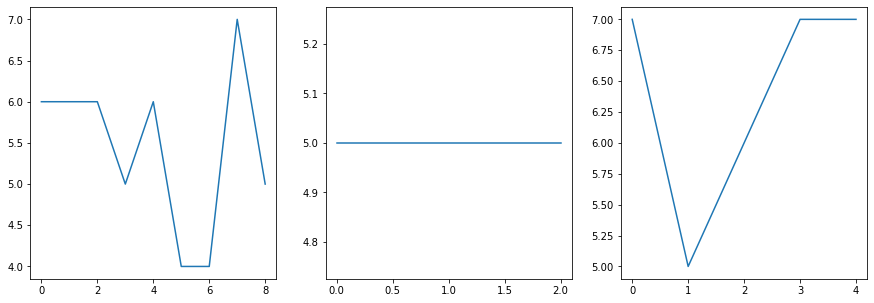

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))

ax1.plot([i for i in range(len(p1_rating))],p1_rating)
ax2.plot([i for i in range(len(p7_rating))],p7_rating)
ax3.plot([i for i in range(len(p8_rating))],p8_rating)

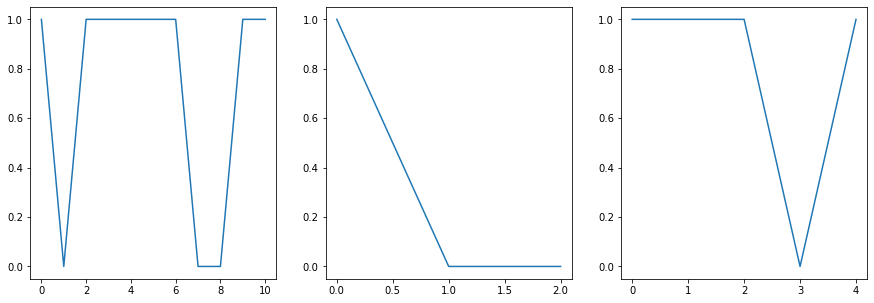

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))

ax1.plot([i for i in range(len(p1_broken))],p1_broken)
ax2.plot([i for i in range(len(p7_broken))],p7_broken)
ax3.plot([i for i in range(len(p8_broken))],p8_broken)

#look at the dates do a plot to do frequency of focus session per date

Overall participants have consistent behaviour over the study duration.

In [62]:
exman_p1 = exman_rating[exman_rating.PSNR == "p01" ]["percentageCompletedGoals"].astype(int)
exman_p9 = exman_rating[exman_rating.PSNR == "p09"]["percentageCompletedGoals"].astype(int)
exman_p12 = exman_rating[exman_rating.PSNR == "p12"]["percentageCompletedGoals"].astype(int)

pomodoro_p1 = pomodoro_rating[pomodoro_rating.PSNR == "p01"]["percentageCompletedGoals"].astype(int)
pomodoro_p9 = pomodoro_rating[pomodoro_rating.PSNR == "p09"]["percentageCompletedGoals"].astype(int)
pomodoro_p12 = pomodoro_rating[pomodoro_rating.PSNR == "p12"]["percentageCompletedGoals"].astype(int)

In [63]:
tStat, pValue = stats.ttest_ind(exman_p1, pomodoro_p1, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.17230829673040018 T-Statistic:-1.5491933384829666


In [64]:
tStat, pValue = stats.ttest_ind(exman_p9, pomodoro_p9, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.49999999999999956 T-Statistic:1.0
